# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:¶
### 1. Importing your libraries and data
### 2. Subsetting, wrangling, and cleaning time-series data
### 3. Time series analysis: decomposition
### 4. Testing for stationarity
### 5. Stationarizing the Total Revenue for Sports Teams and Clubs
### 6. Repeating differencing

 # Importing your libraries and data

### Before you start this analysis, you'll need a new library you haven't installed before—Quandl. Install Quandl using conda:conda install quandl

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [3]:
# Configure API key 

quandl.ApiConfig.api_key = 'yjsBNwb9AAbzzbZ9FaWR'

In [4]:
# Importing the Federal Reserve Economic Data "Total Revenue for Sports Teams and Clubs, All Establishments, Employer Firms " variable.

data = quandl.get('FRED/REVEF711211ALLEST')

In [5]:
# The value represents the 'Revenue in Millions'
data.head(5)

,Value
Date,
1998-01-01,8812.0
1999-01-01,9261.0
2000-01-01,10739.0
2001-01-01,11461.0
2002-01-01,13025.0


# 2. Subsetting, wrangling, and cleaning time-series data

In [6]:
data.shape

(23, 1)

In [7]:
data.columns

Index(['Value'], dtype='object')

In [8]:
# Check for data type
type(data)

pandas.core.frame.DataFrame

In [9]:
# Check for missing values 
data.isnull().sum()

Value    0
dtype: int64

In [13]:
# Check for duplicates
dups = data.duplicated()
dups.sum()

0

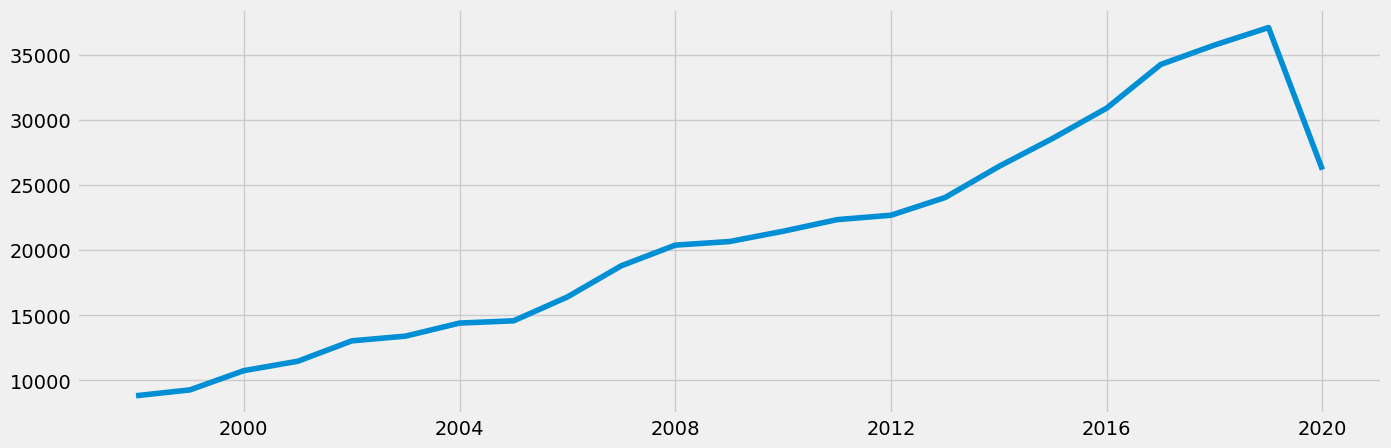

In [15]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

### No need to subset the data because is too small for the analysis

# 3. Time-series analysis: decomposition

In [19]:
# Decompose the time series using an multiplicative model
# Total Revenue for Sports Teams and Clubs follows a non linear in path

decomposition = sm.tsa.seasonal_decompose(data, model='multiplicative')

In [20]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

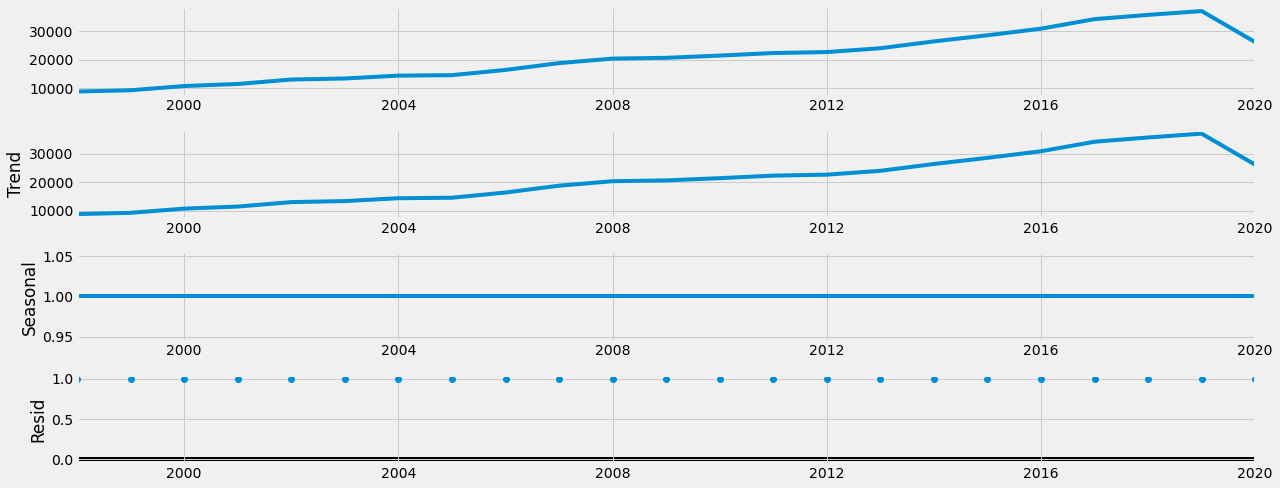

In [21]:
# Plot the separate components

decomposition.plot()
plt.show()

### The level shows the total revenue for sports teams has been increasing from 1998 until about 2018 where it begins to have a downward slop. The trend is the same with level so am working with a smoothe data, No seasonality in the chart because it has a flat line, It has a little noise because it has been smoothed.

# 4. Testing for stationarity

In [22]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  5.535367
p-value                         1.000000
Number of Lags Used             9.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


### The above shows the test statistics is not lesser than the critical value.

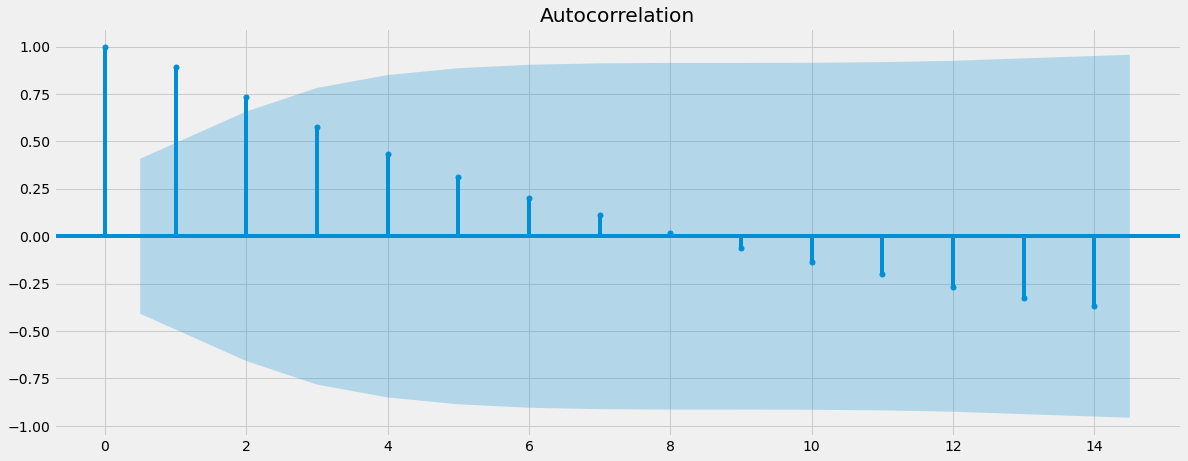

In [23]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data)
plt.show()

# 5. Stationarizing the Total Revenue for Sports Teams and Clubs

In [24]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
# By calculating difference between every values and its lag
data_diff = data - data.shift(1)

In [25]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [26]:
data_diff.head()

,Value
Date,
1999-01-01,449.0
2000-01-01,1478.0
2001-01-01,722.0
2002-01-01,1564.0
2003-01-01,366.0


In [27]:
data_diff.columns

Index(['Value'], dtype='object')

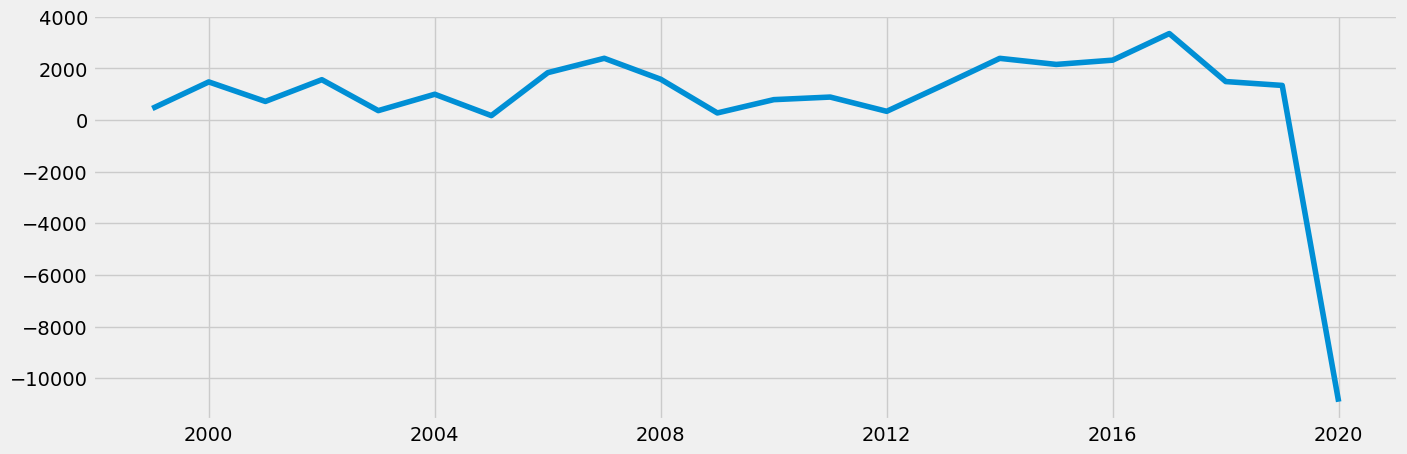

In [28]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [29]:
# Checking the Dickey-Fuller test
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  0.728623
p-value                         0.990392
Number of Lags Used             9.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


### The above still shows the test statistics not lower than the critical value, and the p-value greated than 0.5 which shows non-stationarity. so I'll repeat the differencing

# 6. Repeating differencing

In [31]:
# By calculating difference between every values and its lag
data_diff = data - data.shift(2) 

In [32]:
# remove the missing values
data_diff.dropna(inplace = True)

In [33]:
# Checking the Dickey-Fuller test
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.312338
p-value                         0.014336
Number of Lags Used             4.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


### This shows the test statistics is lower than the critical value at 5% and this means the null hypothesis can be rejected. P-value lower than 0.05% which shows a significant difference. This also shows there is no unit root and it has staionarity.

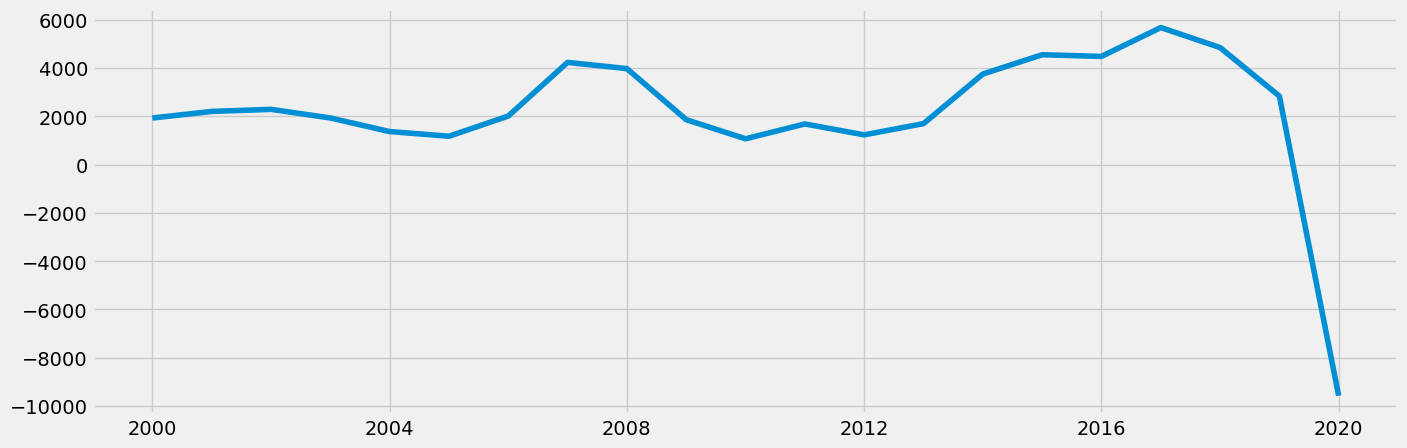

In [34]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

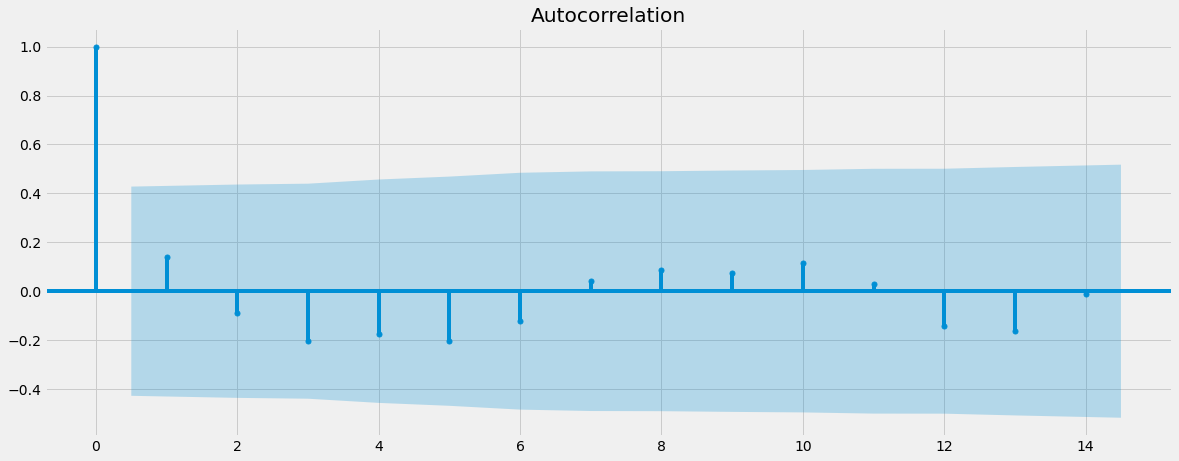

In [35]:
# Check out a plot of autocorrelations
plot_acf(data_diff)
plt.show()

### The autocorrelation plot has improved, it’s still not perfect. This means that, despite the Dickey-Fuller test saying that your data is stationary, that stationarity is weak because there isn't 10 significant lags or 10 vertical lines above the confidence interval and also there is a lag out side the confidence interval.